In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import matplotlib.cm as cm
from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D
import seaborn as sns  # Import Seaborn

qssa_method_path = "../../figs/QSSA/data/"
case_name = "SandiaFlame"

line_arr = ('-','--','-.',':')
color_arr = ('k','r','b','y','g', 'c','m')
symbol_arr = ('s','o','v','^','*')


Column 'CEM' missing in df_original for case 'Sandia_D', skipping CVODE plot.
Column 'Qdot' missing in df_original for case 'Sandia_D', skipping CVODE plot.


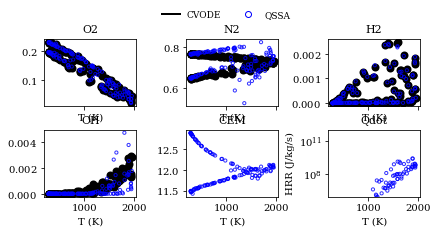

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.ticker as mticker

# --- Paths and case info ---
fig_dir = "../../figs/NH3"


qssa_method_path = "../../figs/QSSA/data/"
case_name = "SandiaFlame"

line_arr = ('-','--','-.',':')
color_arr = ('k','r','b','y','g', 'c','m')
symbol_arr = ('s','o','v','^','*')


target_case_assemble = [
    # 'Sandia_C',
    'Sandia_D',
    # 'Sandia_E',
    # 'Sandia_F',
]

# --- Initialize subplots (2 rows and 3 columns) ---
fig, axs = plt.subplots(2, 3, figsize=(6.73, 3), sharex=True)
data_cols = ['O2', 'N2', 'H2', 'OH', 'CEM', 'Qdot']

# --- Define colors and markers ---
qssa_color = 'blue'
rcce_color = 'red'
qssa_marker = 'o'
rcce_marker = 's'

range_cols = {
    'Qdot': (1e6, 1e12),
}

for target_case in target_case_assemble:
    original_data_path = "../../data"
    original_data_path = os.path.join(original_data_path,case_name, f"{target_case}.csv")
    qssa_data_path = os.path.join(qssa_method_path, case_name, target_case, "predicted_Y.csv")

    # Read data
    df_original = pd.read_csv(original_data_path)
    df_qssa = pd.read_csv(qssa_data_path)

    T = df_original['T'].to_numpy()

    for i, col in enumerate(data_cols):
        row_idx = i // 3
        col_idx = i % 3
        ax = axs[row_idx, col_idx]

        # Check existence in df_original before plotting
        if col in df_original.columns:
            ax.scatter(
                T,
                df_original[col].to_numpy(),
                linewidth=2,
                alpha=1,
                color='black',
                label=f'{target_case} (CVODE)'
            )
        else:
            print(f"Column '{col}' missing in df_original for case '{target_case}', skipping CVODE plot.")

        # Check existence in df_qssa before plotting
        if col in df_qssa.columns:
            ax.scatter(
                T,
                df_qssa[col].to_numpy(),
                s=10,
                alpha=0.8,
                edgecolor='blue',
                facecolors='none',
                marker=qssa_marker,
                label='QSSA'
            )
        else:
            print(f"Column '{col}' missing in df_qssa for case '{target_case}', skipping QSSA plot.")

        # Set scales and labels
        if col == 'Qdot':
            ax.set_yscale('log')
            ax.set_ylim(range_cols['Qdot'])
            ax.set_ylabel('HRR (J/kg/s)', fontsize=10)
        else:
            ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))

        ax.set_xlabel('T (K)', fontsize=10)
        ax.set_title(f"{col}", fontsize=11)

# Custom legend
legend_handles = [
    Line2D([0], [0], color='black', linewidth=2, label='CVODE'),
    Line2D([0], [0], marker=qssa_marker, color='w', label='QSSA',
           markerfacecolor='none', markeredgecolor='blue', markersize=6, linestyle='None'),
]

fig.legend(
    handles=legend_handles,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=3,
    fontsize=9,
    frameon=False
)

plt.subplots_adjust(wspace=0.55, hspace=0.35, top=0.88, bottom=0.15)

os.makedirs(fig_dir, exist_ok=True)
plt.savefig(os.path.join(fig_dir, "1D_CEQ_NH3_combine_Temperature_overall.png"), dpi=300)
plt.show()


# Here I want to create a figure that fig, axs = plt.subplots(4, n(z), figsize=(10, 10), sharex=True), and plot for different z unique value for Sandia_C.csv and the data_cols = ['CH4','OH', 'CEM', 'Qdot'], against r/d, help me modify current code, and the title for each column should be Z = {z}

<ipython-input-8-98f7363d2145>:172: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[i, j].set_ylim(ymin, ymax)


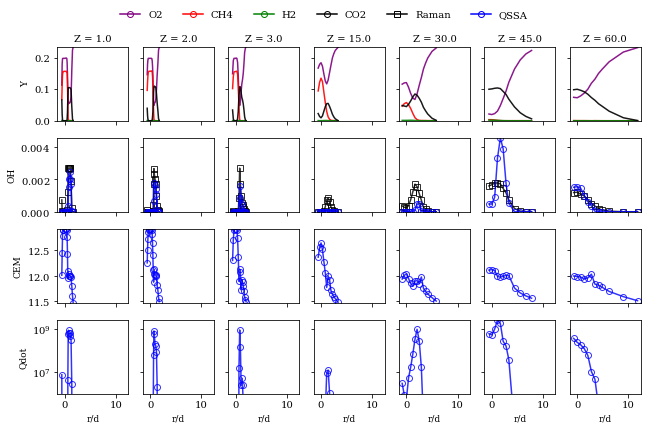

In [8]:


###############################################################################
# 1) Configure global font to 'serif'
###############################################################################
plt.rc('font', family='serif')
# Alternatively: matplotlib.rcParams['font.family'] = 'serif'

###############################################################################
# 2) Paths, Cases, Species
###############################################################################
fig_dir = "../../figs/SandiaFlame"
data_dir = "../../data"
qssa_method_path = "../../figs/QSSA/data/"
case_name = "SandiaFlame"

target_case = "Sandia_F"

# The species we want in the FIRST row subfigure (Raman only)
ori_data_cols = ['O2', 'CH4', 'H2', 'CO2']
ori_colors = {
    'O2':  'purple',
    'CH4': 'red',
    'H2':  'green',
    'CO2': 'black'
}

# The other species we want, each in its own row (Raman + QSSA)
data_cols = ['OH', 'CEM', 'Qdot']

# z-values across columns
z_values = [1.0, 2.0, 3.0, 15.0, 30.0, 45.0, 60.0]
# z_values = [1.0, 2.0, 3.0, 15.0]  # shorter subset example

# Qdot log-scale range, etc.
range_cols = {
    'Qdot': (1e6, 1e10),
}

raman_marker = 's'
qssa_color   = 'blue'
qssa_marker  = 'o'

###############################################################################
# 3) Read Data
###############################################################################
original_data_path = os.path.join(data_dir, case_name, f"{target_case}.csv")
qssa_data_path     = os.path.join(qssa_method_path, case_name, target_case, "predicted_Y.csv")

df_original = pd.read_csv(original_data_path)
df_qssa     = pd.read_csv(qssa_data_path)

# Verify the key columns exist
for needed_col in ['z','r/d']:
    if needed_col not in df_original.columns:
        raise ValueError(f"Column '{needed_col}' not found in {original_data_path}")
    if needed_col not in df_qssa.columns:
        raise ValueError(f"Column '{needed_col}' not found in {qssa_data_path}")

###############################################################################
# 4) Create subplots
#    - First row for the multiple "ori_data_cols" (Raman only)
#    - Next rows for data_cols, 1 species per row (Raman + QSSA)
###############################################################################
nrows = 1 + len(data_cols)  # 1 row for ori_data_cols, then 1 row each for data_cols
ncols = len(z_values)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                        figsize=(1.3*ncols, 1.5*nrows),
                        sharex=True)  # We'll unify x, then unify y row-by-row

###############################################################################
# 5) First Row: multiple species (Raman only), distinct colors/labels
###############################################################################
for j, z in enumerate(z_values):
    ax = axs[0, j]
    
    # Filter data for that z
    df_orig_z = df_original[df_original['z'] == z]

    # Plot each of the 4 species
    for sp in ori_data_cols:
        if sp in df_orig_z.columns and not df_orig_z.empty:
            ax.plot(
                df_orig_z['r/d'],
                df_orig_z[sp],
                color=ori_colors.get(sp, 'gray'),
                alpha=0.9,
                label=sp,
                # marker='o',          # hollow marker
                # fillstyle='none',
                linestyle='-',       # or '--', etc.
            )

    # Column title
    ax.set_title(f"Z = {z}", fontsize=10)

    # Y-axis label only on leftmost column
    if j == 0:
        ax.set_ylabel("Y", fontsize=9)

###############################################################################
# 6) Remaining Rows: each species in data_cols → one row
#    Plot both Raman + QSSA with hollow markers
###############################################################################
for i, spec in enumerate(data_cols, start=1):
    for j, z in enumerate(z_values):
        ax = axs[i, j]
        
        # Filter data by z
        df_orig_z = df_original[df_original['z'] == z]
        df_qssa_z = df_qssa[df_qssa['z'] == z]

        # Plot Raman (CVODE) if present
        if spec in df_orig_z.columns and not df_orig_z.empty:
            ax.plot(
                df_orig_z['r/d'], df_orig_z[spec],
                color='black',
                marker=raman_marker,
                fillstyle='none',  # hollow
                alpha=0.8,
                label='Raman' if (i==1 and j==0) else ""
            )

        # Plot QSSA if present
        if spec in df_qssa_z.columns and not df_qssa_z.empty:
            ax.plot(
                df_qssa_z['r/d'], df_qssa_z[spec],
                color=qssa_color,
                marker=qssa_marker,
                fillstyle='none',  # hollow
                alpha=0.8,
                label='QSSA' if (i==1 and j==0) else ""
            )

        # Y-axis label on leftmost column only
        if j == 0:
            ax.set_ylabel(spec, fontsize=9)

        # If Qdot, use log scale + custom y-limit
        if spec == 'Qdot':
            ax.set_yscale('log')
            if spec in range_cols:
                ax.set_ylim(range_cols[spec])
        else:
            ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))

###############################################################################
# 7) Shared X-label on the bottom row
###############################################################################
for j in range(ncols):
    axs[nrows-1, j].set_xlabel("r/d", fontsize=9)

###############################################################################
# 8) Consistent Y-limits across columns per row
#    Hide y-tick labels except on the leftmost subplot of each row
###############################################################################
for i in range(nrows):
    # Collect all y-data from row i
    ymin, ymax = np.inf, -np.inf
    for j in range(ncols):
        lines = axs[i, j].get_lines()  # all lines in subplot
        for line in lines:
            ydata = line.get_ydata()
            if len(ydata) == 0:
                continue
            cmin, cmax = np.nanmin(ydata), np.nanmax(ydata)
            if np.isfinite(cmin) and np.isfinite(cmax):
                ymin = min(ymin, cmin)
                ymax = max(ymax, cmax)

    # Now set each subplot to use [ymin, ymax] and remove y ticks if j>0
    for j in range(ncols):
        axs[i, j].set_ylim(ymin, ymax)
        if j > 0:
            axs[i, j].set_yticklabels([])

###############################################################################
# 9) Global legend
###############################################################################
# We'll define a custom legend containing:
#   - the 4 first-row species
#   - "Raman"
#   - "QSSA"
legend_handles = [
    Line2D([0], [0], marker='o', fillstyle='none', color=ori_colors.get('O2','gray'),
           label='O2', linestyle='-'),
    Line2D([0], [0], marker='o', fillstyle='none', color=ori_colors.get('CH4','gray'),
           label='CH4', linestyle='-'),
    Line2D([0], [0], marker='o', fillstyle='none', color=ori_colors.get('H2','gray'),
           label='H2',  linestyle='-'),
    Line2D([0], [0], marker='o', fillstyle='none', color=ori_colors.get('CO2','gray'),
           label='CO2', linestyle='-'),
    Line2D([0], [0], marker=raman_marker, fillstyle='none', color='black',
           label='Raman', linestyle='-'),
    Line2D([0], [0], marker=qssa_marker, fillstyle='none', color=qssa_color,
           label='QSSA', linestyle='-')
]

fig.legend(
    handles=legend_handles,
    loc='upper center',
    bbox_to_anchor=(0.5, 1),
    ncol=6,
    fontsize=10,
    frameon=False
)

###############################################################################
# 10) Final Layout & Save
###############################################################################
fig.tight_layout(rect=[0, 0, 1, 0.95])
os.makedirs(fig_dir, exist_ok=True)

plot_name = f"{target_case}_mix_first_row_improved.png"
plt.savefig(os.path.join(fig_dir, plot_name), dpi=300)
plt.show()

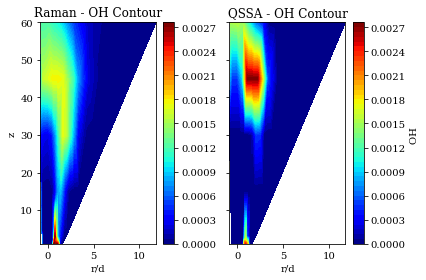

In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# 1) Paths and Setup
# -----------------------------------------------------------------------------
fig_dir = "../../figs/SandiaFlame"
data_dir = "../../data"
qssa_method_path = "../../figs/QSSA/data/"
case_name = "SandiaFlame"
target_case = "Sandia_F"

os.makedirs(fig_dir, exist_ok=True)

# -----------------------------------------------------------------------------
# 2) Read Data
# -----------------------------------------------------------------------------
raman_csv = os.path.join(data_dir, case_name, f"{target_case}.csv")
qssa_csv  = os.path.join(qssa_method_path, case_name, target_case, "predicted_Y.csv")

df_raman = pd.read_csv(raman_csv)
df_qssa  = pd.read_csv(qssa_csv)

# Exclude z=75 from both datasets
df_raman = df_raman[df_raman['z'] != 75]
df_qssa  = df_qssa[df_qssa['z'] != 75]

# Check columns
for needed_col in ['r/d','z','OH']:
    if needed_col not in df_raman.columns:
        raise ValueError(f"Column '{needed_col}' missing in Raman data: {raman_csv}")
    if needed_col not in df_qssa.columns:
        raise ValueError(f"Column '{needed_col}' missing in QSSA data: {qssa_csv}")

# -----------------------------------------------------------------------------
# 3) Prepare Arrays & Clip QSSA to Raman Range
# -----------------------------------------------------------------------------
x_raman = df_raman['r/d'].to_numpy()
y_raman = df_raman['z'].to_numpy()
z_raman = df_raman['OH'].to_numpy()

x_qssa  = df_qssa['r/d'].to_numpy()
y_qssa  = df_qssa['z'].to_numpy()
z_qssa  = df_qssa['OH'].to_numpy()

# Determine color range from Raman only
vmin_raman = np.nanmin(z_raman)
vmax_raman = np.nanmax(z_raman)

# Clip QSSA data to that range so we can keep the same scale
z_qssa_clipped = np.clip(z_qssa, vmin_raman, vmax_raman)

# -----------------------------------------------------------------------------
# 4) Create figure with 2 subplots side by side
# -----------------------------------------------------------------------------
fig, axs = plt.subplots(1, 2, figsize=(6, 4), sharey=True)

# --------------------------
# Left subplot: Raman
# --------------------------
contour_raman = axs[0].tricontourf(
    x_raman, y_raman, z_raman,
    levels=50,
    cmap="jet",
    vmin=vmin_raman,
    vmax=vmax_raman
)
axs[0].set_title("Raman - OH Contour")
axs[0].set_xlabel("r/d")
axs[0].set_ylabel("z")

cbar_raman = fig.colorbar(contour_raman, ax=axs[0])
# cbar_raman.set_label("OH (Raman scale)")

# --------------------------
# Right subplot: QSSA (clipped)
# --------------------------
contour_qssa = axs[1].tricontourf(
    x_qssa, y_qssa, z_qssa_clipped,
    levels=50,
    cmap="jet",
    vmin=vmin_raman,
    vmax=vmax_raman
)
axs[1].set_title("QSSA - OH Contour")
axs[1].set_xlabel("r/d")
# sharey=True => same y-limits, label on left

cbar_qssa = fig.colorbar(contour_qssa, ax=axs[1])
cbar_qssa.set_label("OH ")

# -----------------------------------------------------------------------------
# 5) Layout & Save
# -----------------------------------------------------------------------------
plt.tight_layout()
output_png = os.path.join(fig_dir, f"{target_case}_OH_contour_raman_qssa.png")
plt.savefig(output_png, dpi=300)
plt.show()